In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./datasets/pima_diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [53]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 112)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
def get_clf_eval(y_test, pred , pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f} , f1 : {f1score:.4f} , AUC:{auc:.4f}')

In [55]:
get_clf_eval(y_test , pred , pred_proba)

오차행렬
[[88 11]
 [28 27]]
정확도:0.7468, 정밀도:0.7105, 재현율: 0.4909 , f1 : 0.5806 , AUC:0.7901


In [56]:
import matplotlib.pyplot as plt
def precision_recall_curve_plot(y_test, pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba)
    # print(len(recall))
    # matplotlib.pyplot.plot
    plt.plot(thresholds , precision[:-1] , 'b--' , label="precision")
    plt.plot(thresholds , recall[:-1] , 'r-', label="recall")
    plt.xlabel("thresholds")
    plt.ylabel("precsion & recall")
    plt.legend()
    plt.show()

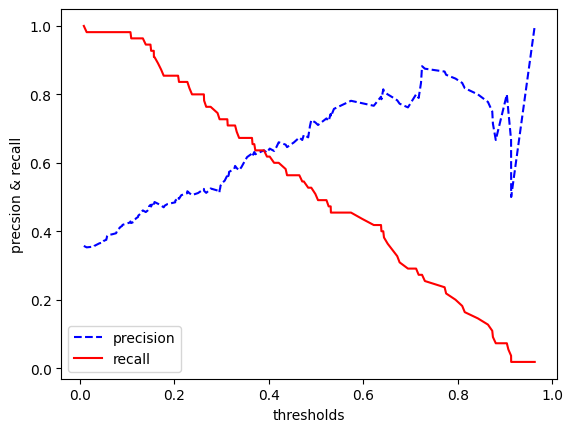

In [57]:
precision_recall_curve_plot(y_test , pred_proba)

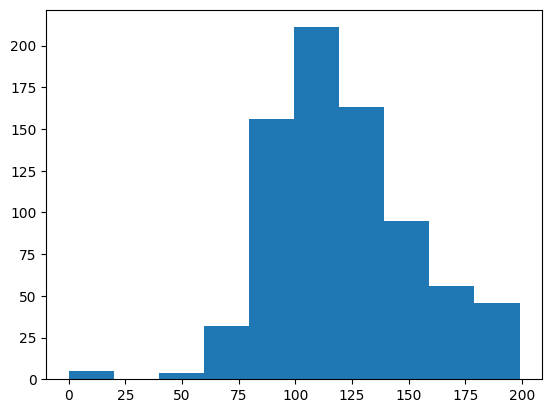

In [58]:
plt.hist(diabetes_data['Glucose'], bins=10)
plt.show()

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
lr_clf.fit(scaled_X_train, y_train)
scaled_pred = lr_clf.predict(scaled_X_test)
scaled_pred_proba = lr_clf.predict_proba(scaled_X_test)[:,1]

In [61]:
get_clf_eval(y_test , pred , pred_proba)

오차행렬
[[88 11]
 [28 27]]
정확도:0.7468, 정밀도:0.7105, 재현율: 0.4909 , f1 : 0.5806 , AUC:0.7901


In [62]:
get_clf_eval(y_test , scaled_pred , scaled_pred_proba)

오차행렬
[[89 10]
 [26 29]]
정확도:0.7662, 정밀도:0.7436, 재현율: 0.5273 , f1 : 0.6170 , AUC:0.7958
